In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [5]:
apple = yf.Ticker("AAPL")
msft = yf.Ticker("MSFT")
ndx = yf.Ticker("NDX")
cmp = [apple, msft, ndx]

def logreturn(comp_name):
    xs = comp_name.history(start = '2000-01-01')
    xs['log_Return'] = np.log(xs.Close) - np.log(xs.Close.shift(1))
    return xs['log_Return']

In [6]:
for i in cmp :
    if i == apple :
        result = pd.DataFrame(logreturn(i))
    else :
        df2 = pd.DataFrame(logreturn(i))
        result = pd.concat([result,df2], axis=1)
result

,log_Return,log_Return,log_Return
Date,,,
2000-01-03 00:00:00-05:00,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,-0.088077,-0.034364,-0.066635
2000-01-05 00:00:00-05:00,0.014527,0.010489,-0.011027
2000-01-06 00:00:00-05:00,-0.090514,-0.034072,-0.048636
2000-01-07 00:00:00-05:00,0.046281,0.012983,0.054971
...,...,...,...
2022-10-04 00:00:00-04:00,0.025300,0.033253,0.030934
2022-10-05 00:00:00-04:00,0.002051,0.001285,-0.000808
2022-10-06 00:00:00-04:00,-0.006648,-0.009718,-0.007605


In [7]:
result.columns = ['appl_lr', 'msft_lr', 'ndx_lr']
result

,appl_lr,msft_lr,ndx_lr
Date,,,
2000-01-03 00:00:00-05:00,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,-0.088077,-0.034364,-0.066635
2000-01-05 00:00:00-05:00,0.014527,0.010489,-0.011027
2000-01-06 00:00:00-05:00,-0.090514,-0.034072,-0.048636
2000-01-07 00:00:00-05:00,0.046281,0.012983,0.054971
...,...,...,...
2022-10-04 00:00:00-04:00,0.025300,0.033253,0.030934
2022-10-05 00:00:00-04:00,0.002051,0.001285,-0.000808
2022-10-06 00:00:00-04:00,-0.006648,-0.009718,-0.007605


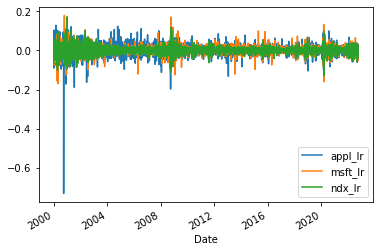

In [8]:
ax = result.plot()

<AxesSubplot:>

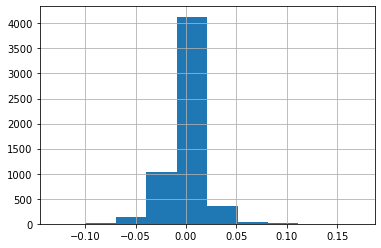

In [9]:
result['ndx_lr'].hist()

<AxesSubplot:>

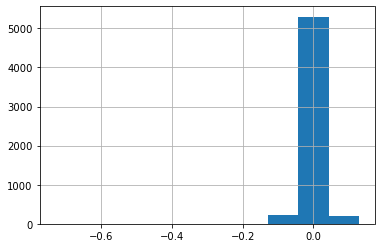

In [10]:
result['appl_lr'].hist(bins=10)

<AxesSubplot:>

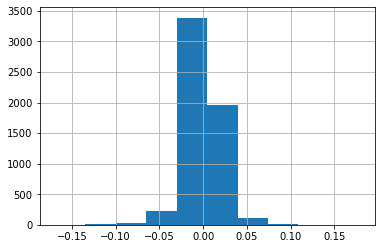

In [11]:
result['msft_lr'].hist(bins=10)

In [12]:
corr1 = result['appl_lr'].corr(result['ndx_lr'])
corr2 = result['appl_lr'].corr(result['msft_lr'])
corr3 = result['msft_lr'].corr(result['ndx_lr'])

print(corr1,corr2,corr3)

0.6477755681277905 0.46152455192269937 0.7470842292446883


Apple and Nasdaq have a strong relationship because their correlation value is near 1.
Apple and Microsoft have a weak relationship because their correlation value is near 0.
Microsoft and Nasdaq have a strong relationship because their correlation value is near 1.

The closer to 1 the more confident we are of a positive linear correlation, so we can say that Apple & Nasdaq and Microsoft & Nasdaq have a strong relationship. However, Apple & Microsoft's correlation value is near 0 so there is no evidence of a strong relationship.


In [13]:
import scipy.stats as stats

In [14]:
stats.ttest_ind(result.dropna()['appl_lr'],result.dropna()['msft_lr'])


Ttest_indResult(statistic=1.3218666695069508, pvalue=0.18623895173278135)

In [15]:
stats.ttest_ind(result.dropna()['appl_lr'],result.dropna()['ndx_lr'])


Ttest_indResult(statistic=1.6928316376724326, pvalue=0.09051471357723202)

In [16]:
stats.ttest_ind(result.dropna()['msft_lr'],result.dropna()['ndx_lr'])


Ttest_indResult(statistic=0.397744216599396, pvalue=0.6908261528078151)